# Project: Fern

### Theory (source: [Wikipedia [1]](https://en.wikipedia.org/wiki/Barnsley_fern))

**The first point** drawn is at the origin (x0 = 0, y0 = 0) and then the new points are iteratively computed by randomly applying one of the following four coordinate transformations:[4][5]

ƒ1

    xn + 1 = 0
    yn + 1 = 0.16 yn.

This coordinate transformation is chosen 1% of the time and just maps any point to a point in the first line segment at the base of the stem. This part of the figure is the first to be completed during the course of iterations.


ƒ2

    xn + 1 = 0.85 xn + 0.04 yn
    yn + 1 = −0.04 xn + 0.85 yn + 1.6.
    
This coordinate transformation is chosen 85% of the time and maps any point inside the leaflet represented by the red triangle to a point inside the opposite, smaller leaflet represented by the blue triangle in the figure.

ƒ3

    xn + 1 = 0.2 xn − 0.26 yn
    yn + 1 = 0.23 xn + 0.22 yn + 1.6.
    
This coordinate transformation is chosen 7% of the time and maps any point inside the leaflet (or pinna) represented by the blue triangle to a point inside the alternating corresponding triangle across the stem (it flips it).

ƒ4

    xn + 1 = −0.15 xn + 0.28 yn
    yn + 1 = 0.26 xn + 0.24 yn + 0.44.
    
This coordinate transformation is chosen 7% of the time and maps any point inside the leaflet (or pinna) represented by the blue triangle to a point inside the alternating corresponding triangle across the stem (without flipping it).

The first coordinate transformation draws the stem. The second generates successive copies of the stem and bottom fronds to make the complete fern. The third draws the bottom frond on the left. The fourth draws the bottom frond on the right. The recursive nature of the IFS guarantees that the whole is a larger replica of each frond. Note that the complete fern is within the range −2.1820 < x < 2.6558 and 0 ≤ y < 9.9983.

Fern can be created by implementation of ```if loops``` and ```while loop```. We will discuss three different approaches to create fern.

### Method 1: Direct implementation 

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import random as random
import numpy as np
import pandas as pd
%matplotlib inline
sns.set()

#### 1.1 Create Fern Data

In [13]:
logfile = open("data/log.txt",'w')

In [14]:
'''initialize first coordinate'''
x = 0
y = 0

'''create list to hold x and y coordinates'''
X = [x]
Y = [y]

'''initialize t for iteration'''
t=1

'''set itration number'''
ITR = 100000

'''set 'isprint' boolean variable to print in logfile/terminal'''
isprint = True

'''control datapoints with while loop'''
while t < ITR:
    
    '''generate a random variable'''
    r = random.uniform(0,100)
    
    '''condition-I'''
    if r <  1.0:
        x = 0
        y = 0.16*Y[t-1]
        X.append(x) ; Y.append(y)
        
        '''condition-II'''    
    elif r > 1.0 and r < 86.0:
        x = 0.85*X[t-1] + 0.04*Y[t-1]
        y = -0.04*X[t-1] + 0.85*Y[t-1]+1.6
        X.append(x);Y.append(y)
        
        '''condition-III'''    
    elif r > 86.0 and r < 93.0:
        x = 0.2*X[t-1] - 0.26*Y[t-1]
        y = 0.23*X[t-1] + 0.22*Y[t-1] + 1.6
        
        X.append(x);Y.append(y)
    
        '''condition-IV'''
    elif r > 93.0 and r < 100.0:
        x = -0.15*X[t-1] + 0.28*Y[t-1]
        y = 0.26*X[t-1] + 0.24*Y[t-1] + 0.44
        
        X.append(x);Y.append(y)
        
        
    if isprint:
        #print("step: ",t,"random number is: ", r,\
        #                "coordinate is : ", x,y)
        
        logfile.write("step: " + str(t) + " random number is: " + str(r) + \
                         " coordinate is : " + str(x) + ","+str(y))
        
        logfile.write("\n")
        
        
    t = t+1
    
logfile.close()

#### 1.2 Save data to a Json file

In [15]:
Data = {"x":X,"y":Y}

In [16]:
import json as json
with open("data/fern_dictionary.json",'w') as f:
    json.dump(Data,f)
    

#### 1.3 Create a Dataframe and save data as csv file

In [17]:
DF = pd.DataFrame(Data)
DF.head()

,x,y
0,0.000000,0.000000
1,0.000000,1.600000
2,0.064000,2.960000
3,0.172800,4.113440
4,0.311418,5.089512


In [18]:
DF.to_csv('data/fern_dataframe.csv')

#### 1.4 Create a Plot and save it as png/pdf file

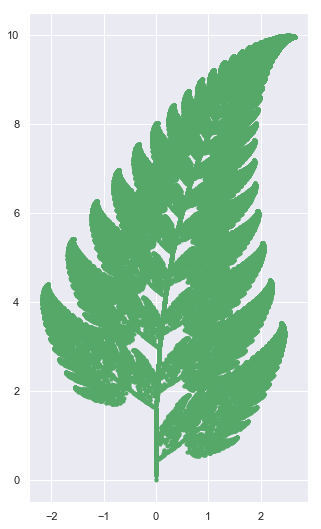

In [20]:
plt.figure(figsize = [5,9])
plt.scatter(X,Y,color = 'g',marker = '.')
plt.savefig("plot/fern.pdf")
plt.savefig("plot/fern.png")
plt.show()

---------

### Mini Assignment
- Define random walk in 2D
- Create a random walk data and save data to file (json/csv)
- Create a plot for random walk in 2D as save the plot as (pdf/png) file

- Hint

In [ ]:
'''if you are in (xi,yi) position go to (xf,yf)'''

'''set up xi,yi'''
<TO DO>

'''store x and y into X and Y list'''
<TO DO>

''' iterate to N steps using for loop'''
<TO DO>
        direction =  random.choice(['x','y'])
        if direction == 'x':
            r = random.choice([-1,1])
            x = X[t-1] +rx
            y = Y[t-1]
        if direction == 'y':
            r = random.choice([-1,1])
            y = Y[t-1] + ry
            x = X[t-1]
    
        '''remember to update X and Y in every loop'''
        X.append(x)
        Y.append(y)

### Reference:
[1] [Barnsley fern](https://en.wikipedia.org/wiki/Barnsley_fern)